# Tarea 1- Statistical Learning-IIO

Héctor Alejandro Aragón Matute- 22001217

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Creando el conjunto de datos

In [50]:
dataHP=pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

In [51]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Extraer columnas con NA

In [52]:
cols_con_na=[col for col in dataHP.columns if (dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [53]:
prop_nan_per_col=dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Las columnas: con Na muy altos son eliminaddos, por considerarse Natural el NA: Alley- 0.937671, FireplaceQu- 0.472603,PoolQC- 0.995205,Fence-0.807534,MiscFeature-0.963014. En ese sentido se identifican caracteristicas que normalmente una Casa no poseeria como: Callejon, Chiminea, Piscina, y otros Miscelaneos.

In [54]:
prop_nan_per_col=dataHP[cols_con_na].mean()
prop_nan_per_col

C:\Users\halej\AppData\Local\Temp\ipykernel_19736\2184724564.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prop_nan_per_col=dataHP[cols_con_na].mean()


LotFrontage      70.049958
MasVnrArea      103.685262
GarageYrBlt    1978.506164
dtype: float64

In [55]:
prop_nan_per_col2=dataHP[cols_con_na].median()
prop_nan_per_col2

C:\Users\halej\AppData\Local\Temp\ipykernel_19736\1307326108.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  prop_nan_per_col2=dataHP[cols_con_na].median()


LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1980.0
dtype: float64

Tipos de dato

In [56]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

## CCA

#### Revisión de tipos de datos FLOAT(Numericos)

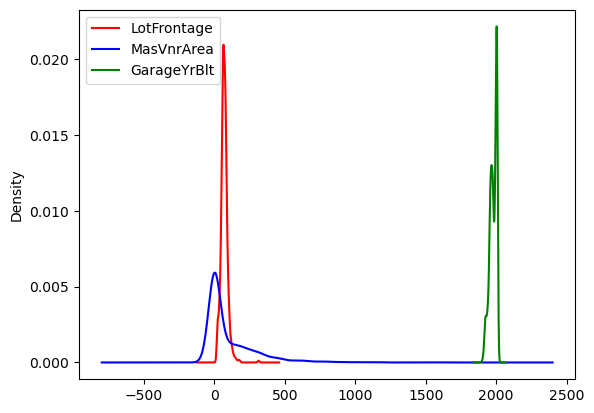

In [57]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['LotFrontage'].plot.density(color='red', label='LotFrontage')
dataHP['MasVnrArea'].plot.density(color='blue', label='MasVnrArea')
dataHP['GarageYrBlt'].plot.density(color='green', label='GarageYrBlt')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()


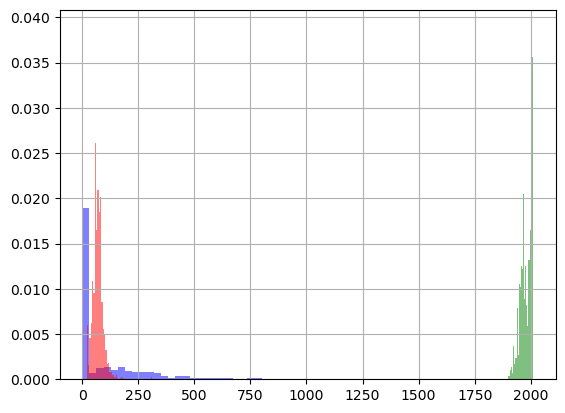

In [58]:
dataHP['MasVnrArea'].hist(bins=50, density=True, color='blue',alpha=0.5)
dataHP['LotFrontage'].hist(bins=50, density=True, color='red',alpha=0.5)
dataHP['GarageYrBlt'].hist(bins=50, density=True, color='green',alpha=0.5)
plt.show()

#### Desición de imputación 1- Para Variables FLOAT:

Luego de revisar las graficas, medias y medianas se considera que no se afectaria estadisticamente as variables si se las imputa con la Mediana

In [59]:
mediana1=dataHP['MasVnrArea'].median()
mediana2=dataHP['LotFrontage'].median()
mediana3=dataHP['GarageYrBlt'].median()

print(f"Mediana 1:{mediana1}")
print(f"Mediana 2:{mediana2}")
print(f"Mediana 3:{mediana3}")

Mediana 1:0.0
Mediana 2:69.0
Mediana 3:1980.0


Crear nuevas columnas con la media y la mediana de la edad

In [60]:
dataHP['MasVnrArea_median'] = np.round(dataHP['MasVnrArea'].fillna(mediana1))
dataHP['LotFrontage_median'] = np.round(dataHP['LotFrontage'].fillna(mediana2))
dataHP['GarageYrBlt_median'] = np.round(dataHP['GarageYrBlt'].fillna(mediana3))

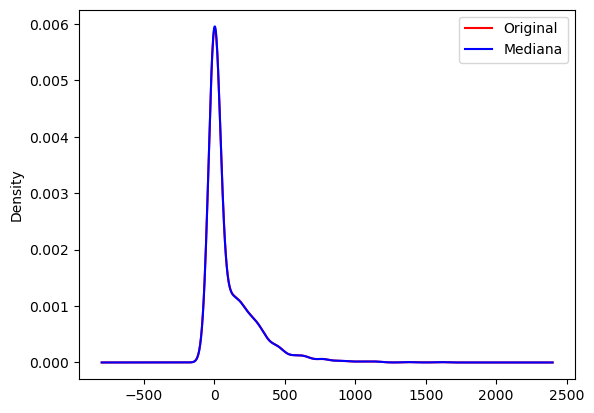

In [61]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['MasVnrArea'].plot.density(color='red', label='Original')
dataHP['MasVnrArea_median'].plot.density(color='blue', label='Mediana')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()

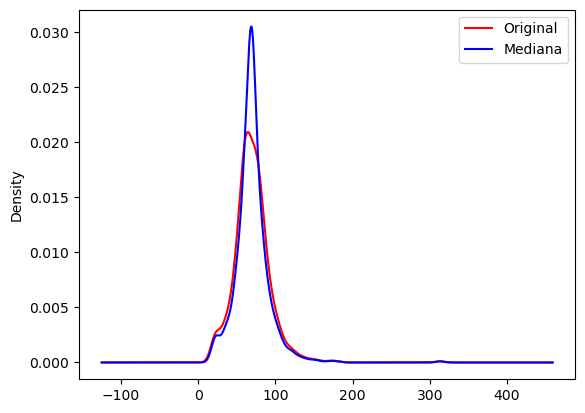

In [62]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['LotFrontage'].plot.density(color='red', label='Original')
dataHP['LotFrontage_median'].plot.density(color='blue', label='Mediana')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()

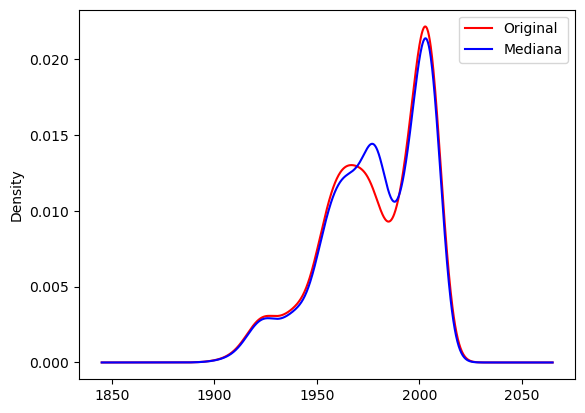

In [63]:
# Graficar la densidad de la columna 'Age' junto con la densidad de la media y la mediana
dataHP['GarageYrBlt'].plot.density(color='red', label='Original')
dataHP['GarageYrBlt_median'].plot.density(color='blue', label='Mediana')
# Agregar leyendas y mostrar la gráfica
plt.legend()
plt.show()

#### Revisión de tipos de datos Object

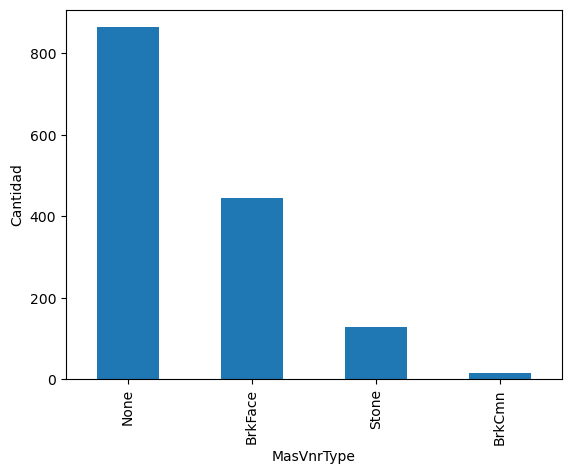

In [64]:
dataHP['MasVnrType'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("MasVnrType")
plt.show()

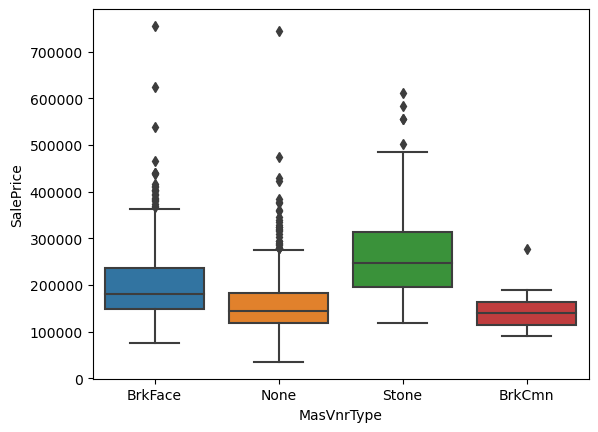

In [65]:
import seaborn as sns
sns.boxplot(x=dataHP['MasVnrType'], y=dataHP['SalePrice'])
plt.show()

Imputar con None

In [66]:
dataHP['MasVnrType'].fillna('None',inplace=True)

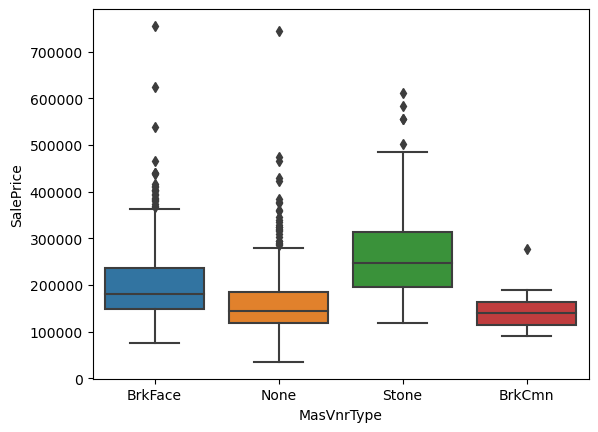

In [67]:
sns.boxplot(x=dataHP['MasVnrType'], y=dataHP['SalePrice'])
plt.show()

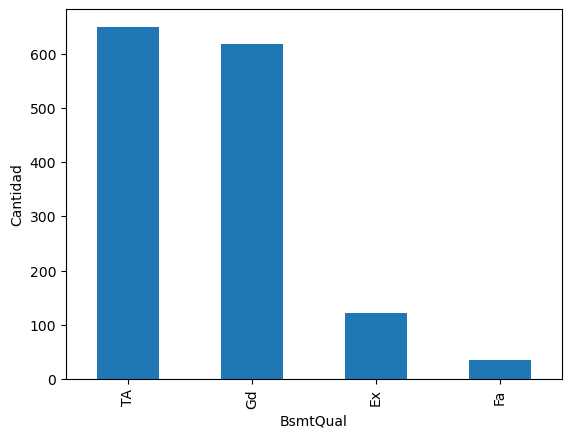

In [68]:
dataHP['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

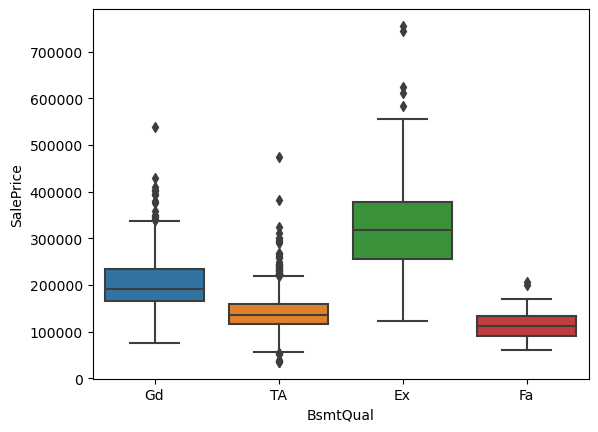

In [69]:
sns.boxplot(x=dataHP['BsmtQual'], y=dataHP['SalePrice'])
plt.show()

Imputar con TA

In [70]:
dataHP['BsmtQual'].fillna('TA',inplace=True)

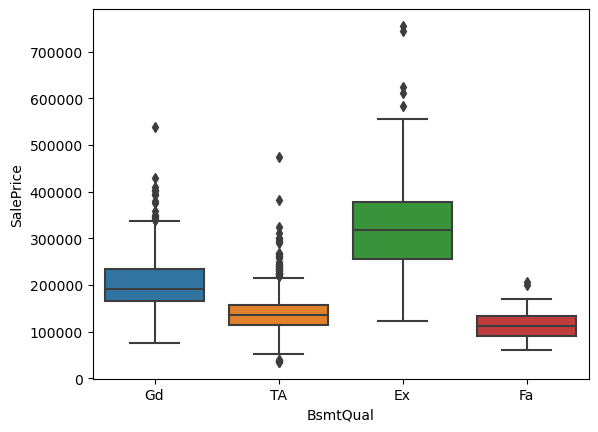

In [71]:
sns.boxplot(x=dataHP['BsmtQual'], y=dataHP['SalePrice'])
plt.show()

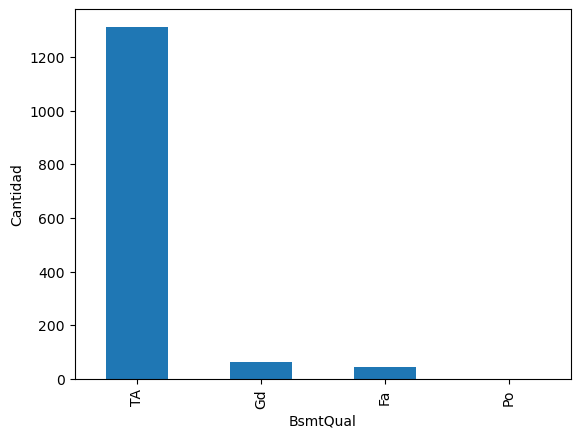

In [72]:
dataHP['BsmtCond'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

Imputar con TA

In [73]:
dataHP['BsmtCond'].fillna('TA',inplace=True)

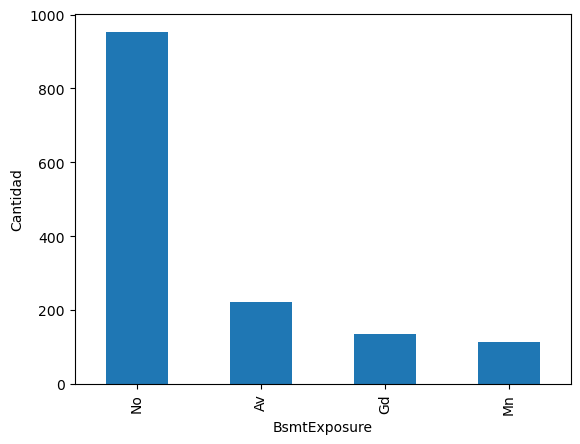

In [74]:
dataHP['BsmtExposure'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtExposure")
plt.show()

Imputar con NO

In [75]:
dataHP['BsmtExposure'].fillna('No',inplace=True)

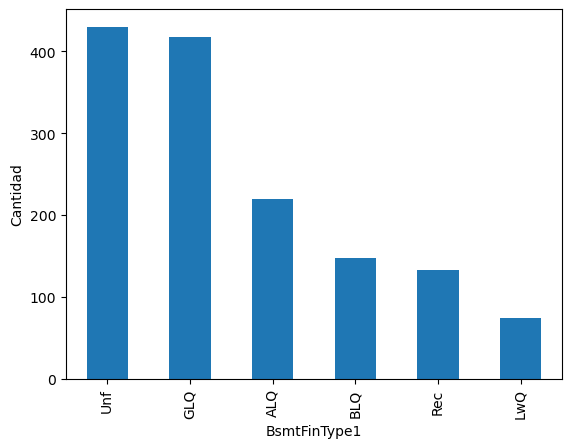

In [76]:
dataHP['BsmtFinType1'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtFinType1")
plt.show()

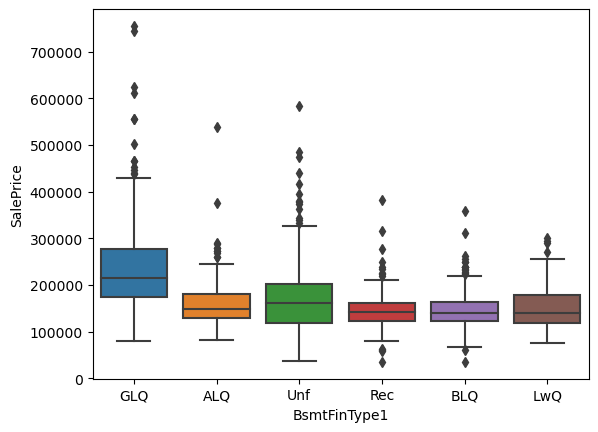

In [77]:
sns.boxplot(x=dataHP['BsmtFinType1'], y=dataHP['SalePrice'])
plt.show()

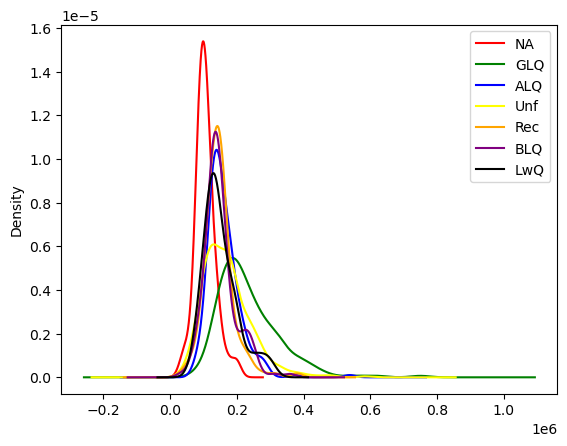

In [78]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="NA")
dataHP[dataHP['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="Green", label="GLQ")
dataHP[dataHP['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataHP[dataHP['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataHP[dataHP['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="orange", label="Rec")
dataHP[dataHP['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataHP[dataHP['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="black", label="LwQ")
ax.legend()

plt.show()

Imputar con BLQ

In [79]:
dataHP['BsmtFinType1'].fillna('BLQ',inplace=True)

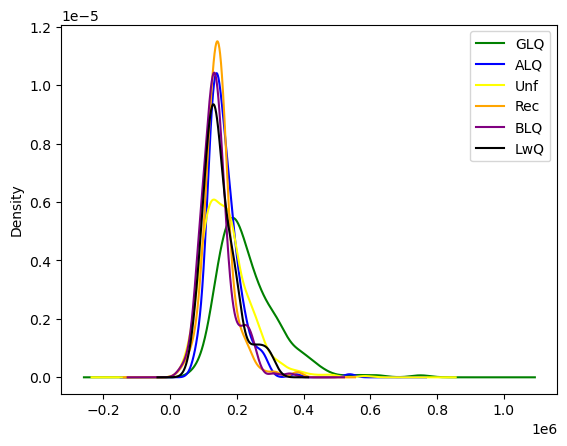

In [80]:
fig = plt.figure()

ax = fig.add_subplot(111)


dataHP[dataHP['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="Green", label="GLQ")
dataHP[dataHP['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="blue", label="ALQ")
dataHP[dataHP['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="yellow", label="Unf")
dataHP[dataHP['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="orange", label="Rec")
dataHP[dataHP['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataHP[dataHP['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="black", label="LwQ")
ax.legend()

plt.show()

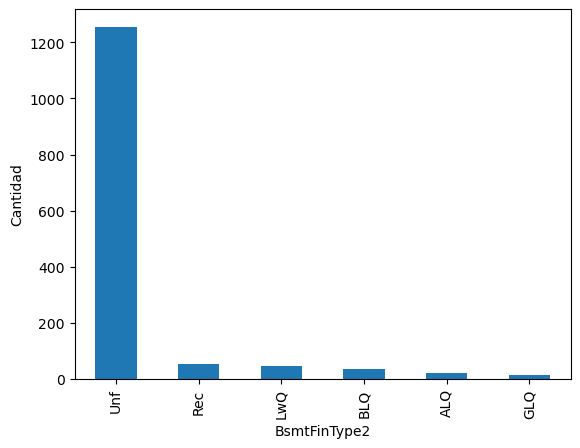

In [81]:
dataHP['BsmtFinType2'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtFinType2")
plt.show()

Imputar con UNF

In [82]:
dataHP['BsmtFinType2'].fillna('UNF',inplace=True)

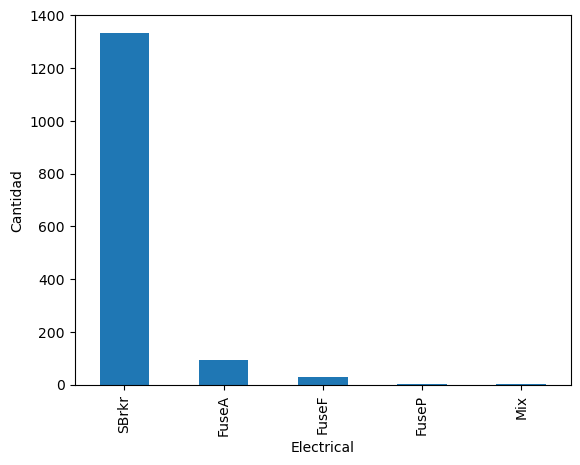

In [83]:
dataHP['Electrical'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("Electrical")
plt.show()

Imputar con SBRKR

In [84]:
dataHP['Electrical'].fillna('UNF',inplace=True)

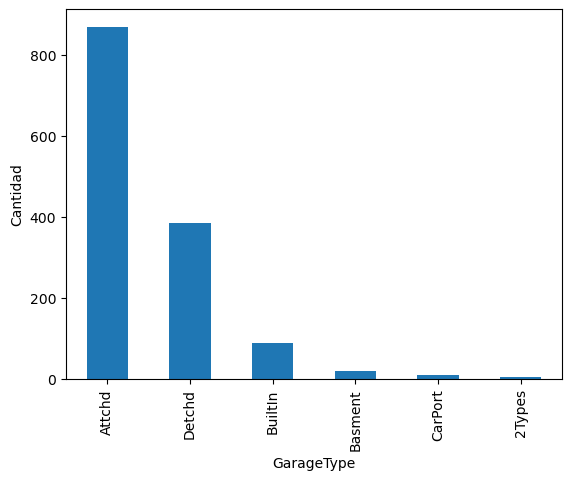

In [85]:
dataHP['GarageType'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageType")
plt.show()

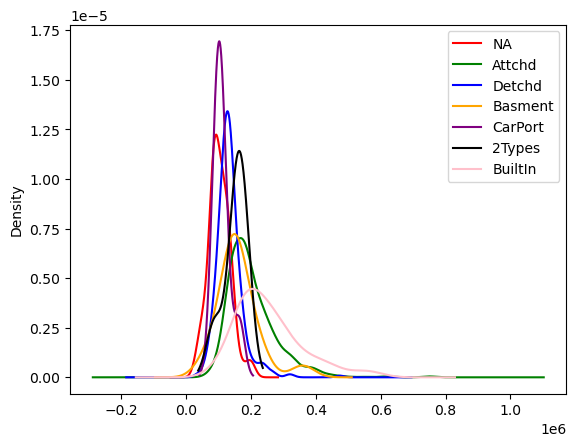

In [86]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="NA")
dataHP[dataHP['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="Green", label="Attchd")
dataHP[dataHP['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="blue", label="Detchd")
dataHP[dataHP['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="orange", label="Basment")
dataHP[dataHP['GarageType'] == 'CarPort']['SalePrice'].plot(kind="kde", color="purple", label="CarPort")
dataHP[dataHP['GarageType'] == '2Types']['SalePrice'].plot(kind="kde", color="black", label="2Types")
dataHP[dataHP['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="pink", label="BuiltIn")

ax.legend()

plt.show()

Imputar con CARPORT

In [87]:
dataHP['GarageType'].fillna('CarPort',inplace=True)

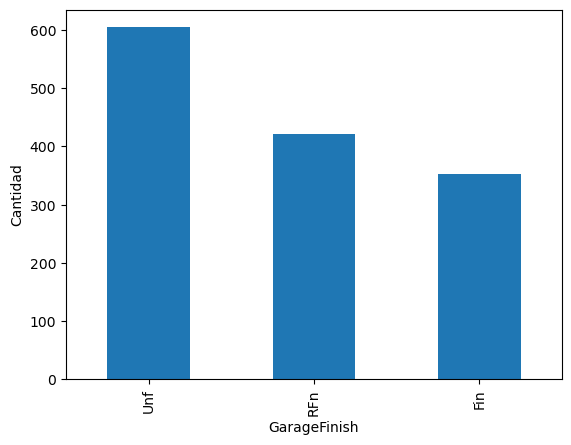

In [88]:
dataHP['GarageFinish'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageFinish")
plt.show()

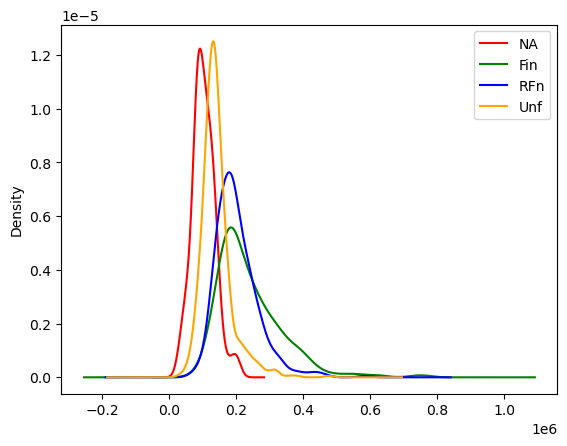

In [89]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="NA")
dataHP[dataHP['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="Green", label="Fin")
dataHP[dataHP['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataHP[dataHP['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")


ax.legend()

plt.show()

Imputar UNF

In [90]:
dataHP['GarageFinish'].fillna('Unf',inplace=True)

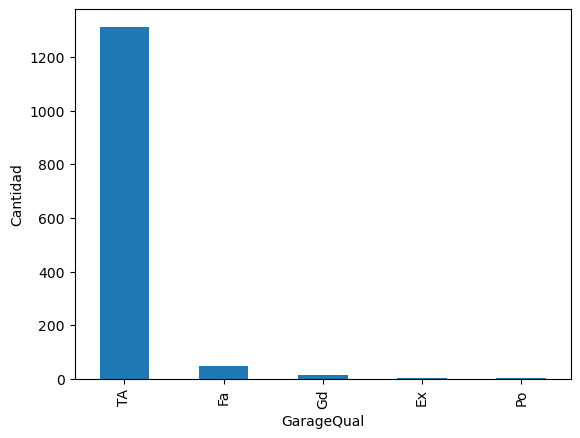

In [91]:
dataHP['GarageQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageQual")
plt.show()

Imputar TA

In [92]:
dataHP['GarageQual'].fillna('TA',inplace=True)

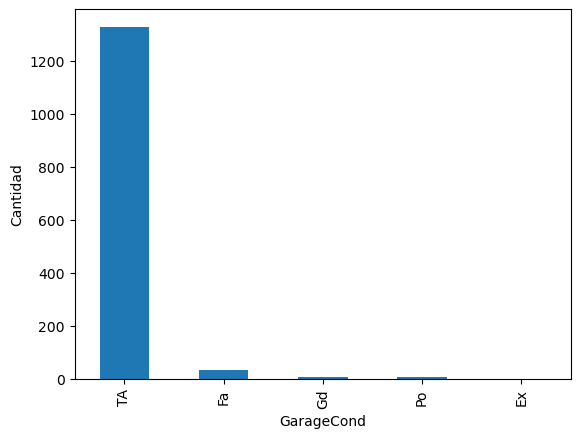

In [93]:
dataHP['GarageCond'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageCond")
plt.show()

Imputar TA

In [94]:
dataHP['GarageCond'].fillna('TA',inplace=True)

## Codificación de Variables

Crear diccionarios de conteo de valores

In [96]:
MasVnrType_freq_maper=(dataHP['MasVnrType'].value_counts().sort_values(ascending=False)).to_dict()
MasVnrType_freq_maper

{'None': 872, 'BrkFace': 445, 'Stone': 128, 'BrkCmn': 15}

In [97]:
BsmtQual_freq_maper=(dataHP['BsmtQual'].value_counts().sort_values(ascending=False)).to_dict()
BsmtQual_freq_maper

{'TA': 686, 'Gd': 618, 'Ex': 121, 'Fa': 35}

In [98]:
BsmtCond_freq_maper=(dataHP['BsmtCond'].value_counts().sort_values(ascending=False)).to_dict()
BsmtCond_freq_maper

{'TA': 1348, 'Gd': 65, 'Fa': 45, 'Po': 2}

In [99]:
BsmtExposure_freq_maper=(dataHP['BsmtExposure'].value_counts().sort_values(ascending=False)).to_dict()
BsmtExposure_freq_maper

{'No': 991, 'Av': 221, 'Gd': 134, 'Mn': 114}

In [100]:
BsmtFinType1_freq_maper=(dataHP['BsmtFinType1'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType1_freq_maper

{'Unf': 430, 'GLQ': 418, 'ALQ': 220, 'BLQ': 185, 'Rec': 133, 'LwQ': 74}

In [101]:
BsmtFinType2_freq_maper=(dataHP['BsmtFinType2'].value_counts().sort_values(ascending=False)).to_dict()
BsmtFinType2_freq_maper

{'Unf': 1256, 'Rec': 54, 'LwQ': 46, 'UNF': 38, 'BLQ': 33, 'ALQ': 19, 'GLQ': 14}

In [102]:
Electrical_freq_maper=(dataHP['Electrical'].value_counts().sort_values(ascending=False)).to_dict()
Electrical_freq_maper

{'SBrkr': 1334, 'FuseA': 94, 'FuseF': 27, 'FuseP': 3, 'Mix': 1, 'UNF': 1}

In [103]:
GarageType_freq_maper=(dataHP['GarageType'].value_counts().sort_values(ascending=False)).to_dict()
GarageType_freq_maper

{'Attchd': 870,
 'Detchd': 387,
 'CarPort': 90,
 'BuiltIn': 88,
 'Basment': 19,
 '2Types': 6}

In [104]:
GarageFinish_freq_maper=(dataHP['GarageFinish'].value_counts().sort_values(ascending=False)).to_dict()
GarageFinish_freq_maper

{'Unf': 686, 'RFn': 422, 'Fin': 352}

In [105]:
GarageQual_freq_maper=(dataHP['GarageQual'].value_counts().sort_values(ascending=False)).to_dict()
GarageQual_freq_maper

{'TA': 1392, 'Fa': 48, 'Gd': 14, 'Ex': 3, 'Po': 3}

In [106]:
GarageCond_freq_maper=(dataHP['GarageCond'].value_counts().sort_values(ascending=False)).to_dict()
GarageCond_freq_maper

{'TA': 1407, 'Fa': 35, 'Gd': 9, 'Po': 7, 'Ex': 2}

In [107]:
dataHP['MasVnrType_Code']=dataHP['MasVnrType'].map(MasVnrType_freq_maper)
dataHP[['MasVnrType','MasVnrType_Code']]

,MasVnrType,MasVnrType_Code
0,BrkFace,445
1,None,872
2,BrkFace,445
3,None,872
4,BrkFace,445
...,...,...
1455,None,872
1456,Stone,128
1457,None,872
1458,None,872


In [108]:
dataHP['BsmtQual_Code']=dataHP['BsmtQual'].map(BsmtQual_freq_maper)
dataHP[['BsmtQual','BsmtQual_Code']]

,BsmtQual,BsmtQual_Code
0,Gd,618
1,Gd,618
2,Gd,618
3,TA,686
4,Gd,618
...,...,...
1455,Gd,618
1456,Gd,618
1457,TA,686
1458,TA,686


In [109]:
dataHP['BsmtCond_Code']=dataHP['BsmtCond'].map(BsmtCond_freq_maper)
dataHP[['BsmtCond','BsmtCond_Code']]

,BsmtCond,BsmtCond_Code
0,TA,1348
1,TA,1348
2,TA,1348
3,Gd,65
4,TA,1348
...,...,...
1455,TA,1348
1456,TA,1348
1457,Gd,65
1458,TA,1348


In [110]:
dataHP['BsmtExposure_Code']=dataHP['BsmtExposure'].map(BsmtExposure_freq_maper)
dataHP[['BsmtExposure','BsmtExposure_Code']]

,BsmtExposure,BsmtExposure_Code
0,No,991
1,Gd,134
2,Mn,114
3,No,991
4,Av,221
...,...,...
1455,No,991
1456,No,991
1457,No,991
1458,Mn,114


In [111]:
dataHP['BsmtFinType1_Code']=dataHP['BsmtFinType1'].map(BsmtFinType1_freq_maper)
dataHP[['BsmtFinType1','BsmtFinType1_Code']]

,BsmtFinType1,BsmtFinType1_Code
0,GLQ,418
1,ALQ,220
2,GLQ,418
3,ALQ,220
4,GLQ,418
...,...,...
1455,Unf,430
1456,ALQ,220
1457,GLQ,418
1458,GLQ,418


In [112]:
dataHP['BsmtFinType2_Code']=dataHP['BsmtFinType2'].map(BsmtFinType2_freq_maper)
dataHP[['BsmtFinType2','BsmtFinType2_Code']]

,BsmtFinType2,BsmtFinType2_Code
0,Unf,1256
1,Unf,1256
2,Unf,1256
3,Unf,1256
4,Unf,1256
...,...,...
1455,Unf,1256
1456,Rec,54
1457,Unf,1256
1458,Rec,54


In [113]:
dataHP['Electrical_Code']=dataHP['Electrical'].map(BsmtFinType2_freq_maper)
dataHP[['Electrical','Electrical_Code']]

,Electrical,Electrical_Code
0,SBrkr,NaN
1,SBrkr,NaN
2,SBrkr,NaN
3,SBrkr,NaN
4,SBrkr,NaN
...,...,...
1455,SBrkr,NaN
1456,SBrkr,NaN
1457,SBrkr,NaN
1458,FuseA,NaN


In [115]:
dataHP['GarageType_Code']=dataHP['GarageType'].map(GarageType_freq_maper)
dataHP[['GarageType','GarageType_Code']]

,GarageType,GarageType_Code
0,Attchd,870
1,Attchd,870
2,Attchd,870
3,Detchd,387
4,Attchd,870
...,...,...
1455,Attchd,870
1456,Attchd,870
1457,Attchd,870
1458,Attchd,870


In [116]:
dataHP['GarageFinish_Code']=dataHP['GarageFinish'].map(GarageFinish_freq_maper)
dataHP[['GarageFinish','GarageFinish_Code']]

,GarageFinish,GarageFinish_Code
0,RFn,422
1,RFn,422
2,RFn,422
3,Unf,686
4,RFn,422
...,...,...
1455,RFn,422
1456,Unf,686
1457,RFn,422
1458,Unf,686


In [117]:
dataHP['GarageQual_Code']=dataHP['GarageQual'].map(GarageQual_freq_maper)
dataHP[['GarageQual','GarageQual_Code']]

,GarageQual,GarageQual_Code
0,TA,1392
1,TA,1392
2,TA,1392
3,TA,1392
4,TA,1392
...,...,...
1455,TA,1392
1456,TA,1392
1457,TA,1392
1458,TA,1392


In [118]:
dataHP['GarageCond_Code']=dataHP['GarageCond'].map(GarageCond_freq_maper)
dataHP[['GarageCond','GarageCond_Code']]

,GarageCond,GarageCond_Code
0,TA,1407
1,TA,1407
2,TA,1407
3,TA,1407
4,TA,1407
...,...,...
1455,TA,1407
1456,TA,1407
1457,TA,1407
1458,TA,1407
